In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

IMG_NAME = 'img.jpg'
IMG_NAME2 = 'img2.jpg'

In [33]:
def getPath(img):
    current_dir = os.getcwd()
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
    image_path = os.path.join(parent_dir, img)
    return image_path

In [49]:
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"No se pudo cargar la imagen desde la ruta: {image_path}")
    return image

def binarize_image(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

def resize_images(image1, image2):
    height, width = image1.shape[:2]
    resized_image2 = cv2.resize(image2, (width, height), interpolation=cv2.INTER_AREA)
    return resized_image2

In [52]:
def execute_operation(img1, img2):
    gray1 = load_image(getPath(img1))
    gray2 = load_image(getPath(img2))    
    gray1 =  cv2.cvtColor(gray1, cv2.COLOR_BGR2GRAY)
    gray2 =  cv2.cvtColor(gray2, cv2.COLOR_BGR2GRAY)
    gray2_resized = resize_images(gray1, gray2)
    
    bin1 = binarize_image(gray1)
    bin2 = binarize_image(gray2_resized)

    suma = cv2.add(bin1, bin2)
    resta = cv2.subtract(bin1, bin2)
    and_op = cv2.bitwise_and(bin1, bin2)
    or_op = cv2.bitwise_or(bin1, bin2)
    xor_op = cv2.bitwise_xor(bin1, bin2)
    
    return suma, resta, and_op, or_op, xor_op


667
667


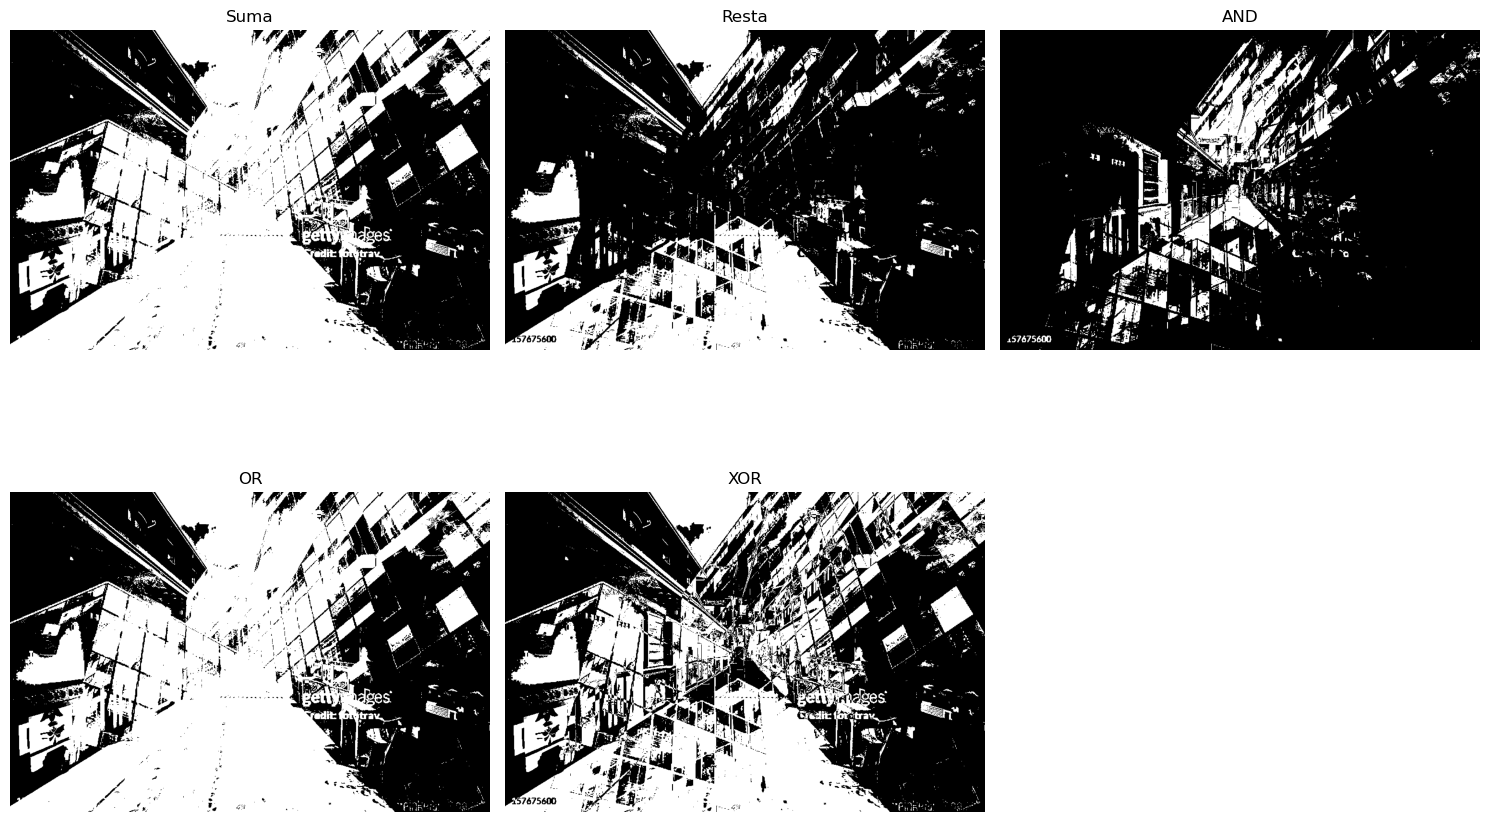

In [53]:
suma, resta, and_op, or_op, xor_op = execute_operation(IMG_NAME, IMG_NAME2)

titles = ['Suma', 'Resta', 'AND', 'OR', 'XOR']
images = [suma, resta, and_op, or_op, xor_op]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
image_path = getPath(IMG_NAME2)
print(image_path)

C:\Users\gerda\Documents\Maestria\Text Mining & Image Recognition\gdvr-textMining_Lab2\img2.jpg
